# Loan_Defaulter Prediction

Done by:
- Tashfin Ansari
- Shaikh Mohd. Daniyal
- Sayed Quazi Danyal
- Mahvash Nasheed Maghrabi 
- Khizer Ahmed Biyabani

We have performed a Load_defaulter prediction project, that governs in predicting the possible loan defaulters from the given data set.

##### Importing Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

%matplotlib inline

In [2]:
train_df =  pd.read_csv(r"C:\Users\Khizer Ahmed\Desktop\Python\aiolos-DataScience/Training_Data1.csv")

##### Reading our Dataset

In [3]:
train_df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
train_df.shape

(252000, 13)

In [5]:
train_df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


##### Checking For Null Values

In [6]:
train_df.isna().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [7]:
train_df

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


##### To see the data-type of our attributes.


In [8]:
train_df.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

##### To see the correlation coefficient of the numeric varriables

In [9]:
train_df.corr()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
current_job_years,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
current_house_years,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
risk_flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


### Visualising the Numeric Attributes.

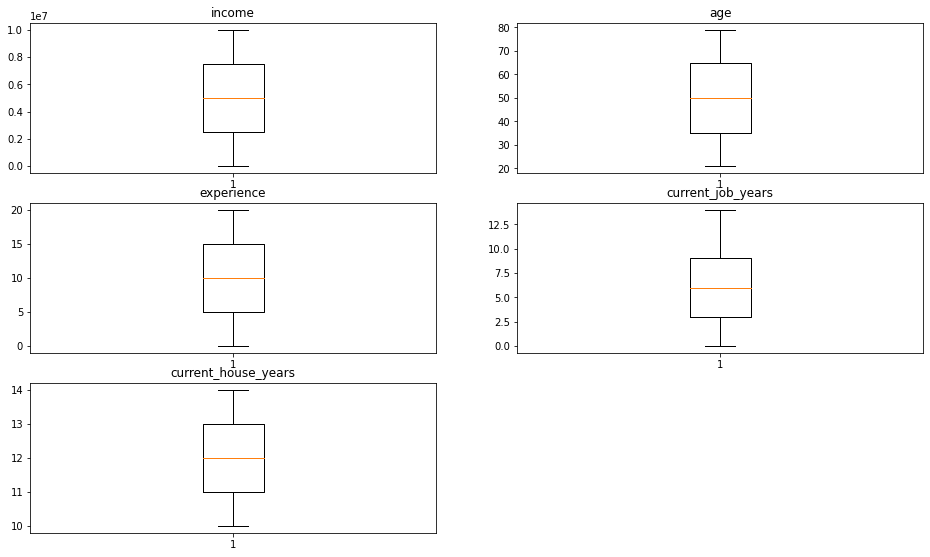

In [10]:
count_var=['income','age','experience','current_job_years','current_house_years']
plt.figure(figsize=(16,16))
for i, j in zip(range(1,6),count_var):
    plt.subplot(5,2,i)
    plt.boxplot(train_df[j])
    plt.title(j)

### Exploring the categorical attributes.

In [11]:
train_df['city'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: city, Length: 317, dtype: int64

In [12]:
train_df['state'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

In [13]:
train_df['profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

#### Dropping the unnecessary columns

The columns like 'city', 'state', 'Id', 'profession' does effect much the target varriable i.e. 'risk_flag'.

In [14]:
train_df=train_df.drop(['state','profession','Id','city'],axis=1)

In [15]:
train_df['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [16]:
train_df['married'].value_counts()

single     226272
married     25728
Name: married, dtype: int64

In [17]:
train_df['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

<AxesSubplot:xlabel='car_ownership'>

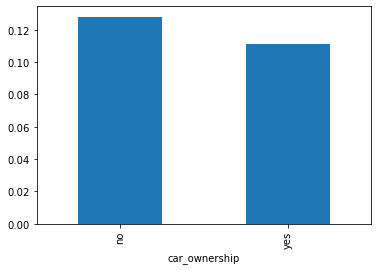

In [18]:
train_df.groupby('car_ownership')['risk_flag'].mean().plot.bar()

<AxesSubplot:xlabel='married'>

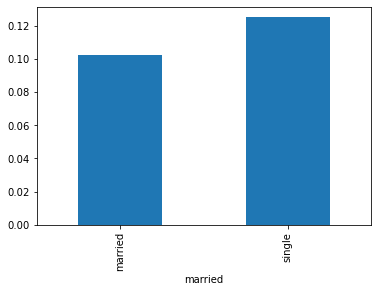

In [19]:
train_df.groupby('married')['risk_flag'].mean().plot.bar()

<AxesSubplot:xlabel='house_ownership'>

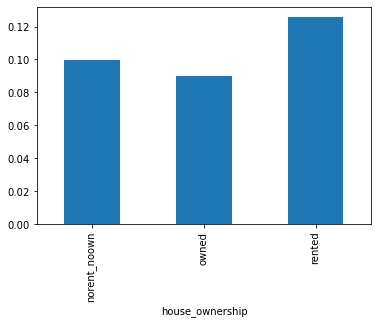

In [20]:
train_df.groupby('house_ownership')['risk_flag'].mean().plot.bar()

In [21]:
train_df['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

### Converting Categorical attibute values into numeric or integer.

In [22]:
train_df=pd.get_dummies(train_df)
train_df

,income,age,experience,current_job_years,current_house_years,risk_flag,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes
0,1303835,23,3,3,13,0,0,1,0,0,1,1,0
1,7574516,40,10,9,13,0,0,1,0,0,1,1,0
2,3991815,66,4,4,10,0,1,0,0,0,1,1,0
3,6256451,41,2,2,12,1,0,1,0,0,1,0,1
4,5768871,47,11,3,14,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,0,1,0,0,1,1,0
251996,2843572,26,10,6,11,0,0,1,0,0,1,1,0
251997,4522448,46,7,7,12,0,0,1,0,0,1,1,0
251998,6507128,45,0,0,10,0,0,1,0,0,1,1,0


## Splitting the data-set into training and testing sets.

We are dividing our data-set into a training and a testing  (validation) set. 

Also, we are separating the target varriable and the attributes or the dependent variables.

In [23]:
train_df.shape

(252000, 13)

In [24]:
# train = train_df[0:211600]
# test = train_df[211600:]

X = train_df.drop('risk_flag',axis=1)
y =  train_df['risk_flag']

In [25]:
X.shape

(252000, 12)

In [26]:
# x_train=train.drop('risk_flag',axis=1)
# y_train=train['risk_flag']
# x_test=test.drop('risk_flag',axis=1)
# y_test=test['risk_flag']


x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=44)

## Model Building

### Using Logistic Regression

##### Model Fitting

In [27]:
logreg =  LogisticRegression()

In [28]:
logreg.fit(x_train,y_train)

LogisticRegression()

##### Model Evaluation

In [29]:
pred = logreg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
#score=logreg.score(x_train,y_train)
score1 = accuracy_score(y_test,pred)
score1

0.8769246031746032

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44197
           1       0.00      0.00      0.00      6203

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



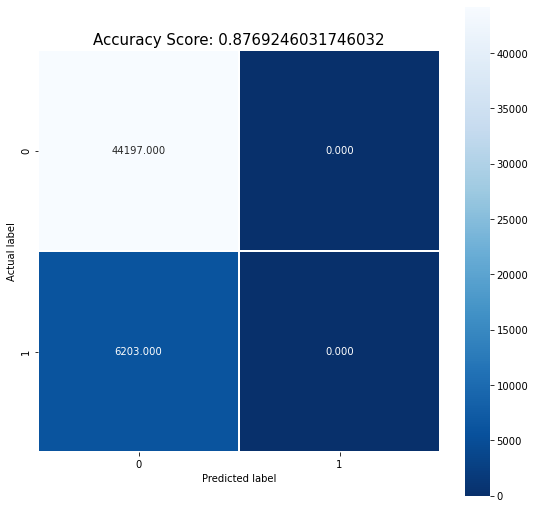

In [32]:
cm = metrics.confusion_matrix(y_test,pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

### Using Decision Trees 

##### Model Fitting

In [33]:
dec_tree = DecisionTreeClassifier()

In [34]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

##### Model Evaluation

In [35]:
pred1 = dec_tree.predict(x_test)

In [36]:
#score =  dec_tree.score(x_train,y_train)
score = accuracy_score(y_test,pred1)
score

0.8825793650793651

In [37]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     44197
           1       0.52      0.56      0.54      6203

    accuracy                           0.88     50400
   macro avg       0.73      0.75      0.74     50400
weighted avg       0.89      0.88      0.88     50400



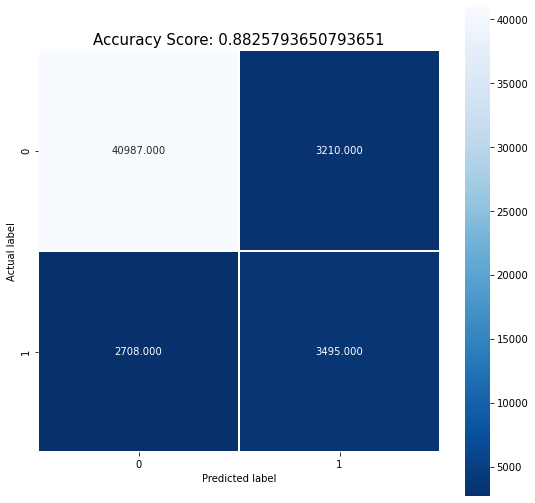

In [38]:
cm1 = metrics.confusion_matrix(y_test,pred1)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [39]:
test_data = pd.read_csv(r'C:\Users\Khizer Ahmed\Desktop\Python\aiolos-DataScience/Test_Data1.csv')

### Random Forest

In [40]:
#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

rf = RandomForestClassifier(random_state=42,max_features='sqrt',oob_score= 'TRUE', n_estimators=80)  
rf.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score='TRUE',
                       random_state=42)

In [41]:
pred2 = rf.predict(x_test)
pred2

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
score2=accuracy_score(y_test,pred2)
score2

0.8991071428571429

## Working on the Testing data set

##### Importing the Test_Data.csv

In [43]:
test_data.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,NaN
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,NaN
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,NaN
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,NaN
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,NaN


In [44]:
test_data.describe()

,id,income,age,experience,current_job_years,current_house_years,risk_flag
count,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000,0.0
mean,14000.500000,5.029563e+06,50.054679,10.120393,6.339286,11.991786,NaN
std,8083.048105,2.864938e+06,17.129879,6.027317,3.645222,1.397754,NaN
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,NaN
25%,7000.750000,2.545414e+06,35.000000,5.000000,3.000000,11.000000,NaN
50%,14000.500000,5.046744e+06,50.000000,10.000000,6.000000,12.000000,NaN
75%,21000.250000,7.474639e+06,65.000000,15.000000,9.000000,13.000000,NaN
max,28000.000000,9.999814e+06,79.000000,20.000000,14.000000,14.000000,NaN


In [45]:
test_data = test_data.drop(['id','city','state','city','profession'], axis=1)
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
0,7393090,59,19,single,rented,no,4,13,NaN
1,1215004,25,5,single,rented,no,5,10,NaN
2,8901342,50,12,single,rented,no,9,14,NaN
3,1944421,49,9,married,rented,yes,3,12,NaN
4,13429,25,18,single,rented,yes,13,11,NaN


In [46]:
test_data1 = test_data.drop(['risk_flag'],axis=1) 
test_data1.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,4,13
1,1215004,25,5,single,rented,no,5,10
2,8901342,50,12,single,rented,no,9,14
3,1944421,49,9,married,rented,yes,3,12
4,13429,25,18,single,rented,yes,13,11


In [47]:
test_data1=pd.get_dummies(test_data1)
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years,risk_flag
0,7393090,59,19,single,rented,no,4,13,NaN
1,1215004,25,5,single,rented,no,5,10,NaN
2,8901342,50,12,single,rented,no,9,14,NaN
3,1944421,49,9,married,rented,yes,3,12,NaN
4,13429,25,18,single,rented,yes,13,11,NaN


In [48]:
risk_flag_test =  dec_tree.predict(test_data1)
test_data1['result_risk_flag']=risk_flag_test
test_data1.head()

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes,result_risk_flag
0,7393090,59,19,4,13,0,1,0,0,1,1,0,0
1,1215004,25,5,5,10,0,1,0,0,1,1,0,0
2,8901342,50,12,9,14,0,1,0,0,1,1,0,0
3,1944421,49,9,3,12,1,0,0,0,1,0,1,0
4,13429,25,18,13,11,0,1,0,0,1,0,1,0


In [49]:
test_data1['result_risk_flag'].value_counts()

0    24138
1     3862
Name: result_risk_flag, dtype: int64

## ROC 

In [50]:
ns_probs = [0 for _ in range(len(y_test))]
ns_probs[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [51]:
dec_probs = dec_tree.predict_proba(x_test)
dec_probs[0:10]

array([[0.46153846, 0.53846154],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.48148148, 0.51851852]])

In [52]:
dec_probs = dec_probs[:, 1]
dec_probs = dec_tree.predict_proba(x_test)
dec_probs = dec_probs[:, 1]
rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
lr_probs = logreg.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

In [53]:
ns_auc = roc_auc_score(y_test, ns_probs)
dec_auc = roc_auc_score(y_test, dec_probs)

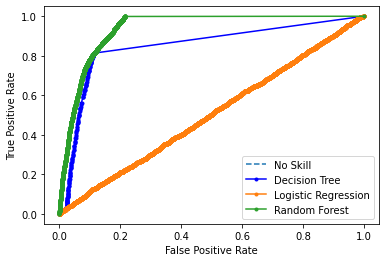

In [54]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dec_fpr, dec_tpr, _ = roc_curve(y_test, dec_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree', color='blue')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [55]:
auc_dec = roc_auc_score(y_test, dec_probs)
print('AUC Decision Tree Classifier: %.3f' % auc_dec)
auc_rf = roc_auc_score(y_test, rf_probs)
print('AUC Random Forest Classifier: %.3f' % auc_rf)
auc_lr = roc_auc_score(y_test, lr_probs)
print("AUC Logistic Regression: %.3f" % auc_lr)

AUC Decision Tree Classifier: 0.849
AUC Random Forest Classifier: 0.937
AUC Logistic Regression: 0.503


### PCA

In [56]:
scalar = StandardScaler()
scalar.fit(X)
x_std = scalar.transform(x_train)
x_test_std = scalar.transform(x_test)


In [57]:
pca = PCA(n_components=2)
pca.fit(x_std)

PCA(n_components=2)

In [58]:
x_train_1 = pca.transform(x_train)
x_test_1 = pca.transform(x_test)

###### Logistiic Regression

In [59]:
logreg.fit(x_train_1,y_train)

LogisticRegression()

In [60]:
pca_pred = logreg.predict(x_test_1)
pca_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
pca_score = accuracy_score(y_test,pca_pred)
pca_score

0.8769246031746032

###### Decison Trees

In [62]:
dec_tree.fit(x_train_1,y_train)

DecisionTreeClassifier()

In [63]:
pca_pred_dec = dec_tree.predict(x_test_1)
pca_pred_dec

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [64]:
pca_score_dec = accuracy_score(y_test,pca_pred_dec)
pca_score_dec

0.884484126984127

##### Random Forest

In [65]:
rf1 = RandomForestClassifier(random_state=42,max_features='sqrt',oob_score= 'TRUE', n_estimators=80)
rf1.fit(x_train_1,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score='TRUE',
                       random_state=42)

In [66]:
pca_pred_rf = rf1.predict(x_test_1)
pca_pred_rf

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [67]:
pca_score_rf = accuracy_score(y_test,pca_pred_rf)
pca_score_rf

0.8890476190476191

#### ROC with PCA

In [68]:
#dec_probs_pca = dec_probs_pca[:, 1]
dec_probs_pca = dec_tree.predict_proba(x_test_1)
dec_probs_pca = dec_probs_pca[:, 1]
rf_probs_pca = rf1.predict_proba(x_test_1)
rf_probs_pca = rf_probs_pca[:, 1]
lr_probs_pca = logreg.predict_proba(x_test_1)
lr_probs_pca = lr_probs_pca[:, 1]

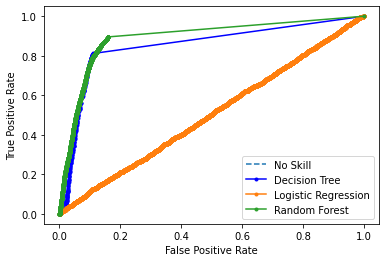

In [71]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dec_fpr_pca, dec_tpr_pca, _ = roc_curve(y_test, dec_probs_pca)
lr_fpr_pca, lr_tpr_pca, _ = roc_curve(y_test, lr_probs_pca)
rf_fpr_pca, rf_tpr_pca, _ = roc_curve(y_test, rf_probs_pca)


# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dec_fpr_pca, dec_tpr_pca, marker='.', label='Decision Tree', color='blue')
plt.plot(lr_fpr_pca, lr_tpr_pca, marker='.', label='Logistic Regression')
plt.plot(rf_fpr_pca, rf_tpr_pca, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [72]:
auc_dec_pca = roc_auc_score(y_test, dec_probs_pca)
print('AUC Decision Tree Classifier: %.3f' % auc_dec_pca)
auc_rf_pca = roc_auc_score(y_test, rf_probs_pca)
print('AUC Random Forest Classifier: %.3f' % auc_rf)
auc_lr_pca = roc_auc_score(y_test, lr_probs_pca)
print("AUC Logistic Regression: %.3f" % auc_lr_pca)

AUC Decision Tree Classifier: 0.850
AUC Random Forest Classifier: 0.937
AUC Logistic Regression: 0.503


### Predictions on the Testing Data set:

From the above obtained results, we conclude that Random Forest Classifier did quite well as compared to the other two algrithms. Hence, we apply the Random Forest Classifier on our Test_Data1.csv file to predict the value of its target variable.

#### Importing and Exploring the Testing Data-set

In [73]:
test_df =  pd.read_csv(r"C:\Users\Khizer Ahmed\Desktop\Python\aiolos-DataScience/Test_Data1.csv")

In [74]:
test_df.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,NaN
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,NaN
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,NaN
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,NaN
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,NaN


In [75]:
test_df.shape

(28000, 13)

In [76]:
test_df.describe()

,id,income,age,experience,current_job_years,current_house_years,risk_flag
count,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000,0.0
mean,14000.500000,5.029563e+06,50.054679,10.120393,6.339286,11.991786,NaN
std,8083.048105,2.864938e+06,17.129879,6.027317,3.645222,1.397754,NaN
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,NaN
25%,7000.750000,2.545414e+06,35.000000,5.000000,3.000000,11.000000,NaN
50%,14000.500000,5.046744e+06,50.000000,10.000000,6.000000,12.000000,NaN
75%,21000.250000,7.474639e+06,65.000000,15.000000,9.000000,13.000000,NaN
max,28000.000000,9.999814e+06,79.000000,20.000000,14.000000,14.000000,NaN


In [77]:
test_df.isnull().any()

id                     False
income                 False
age                    False
experience             False
married                False
house_ownership        False
car_ownership          False
profession             False
city                   False
state                  False
current_job_years      False
current_house_years    False
risk_flag               True
dtype: bool

As *risk_flag* being our target variable we can drop the column. Also, the attributes like profession, city, state and id can be removed from the data set.

In [78]:
test_df_new = test_df.drop(['id','profession','city','state','risk_flag'],axis=1)

In [79]:
test_df_new.head()

,income,age,experience,married,house_ownership,car_ownership,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,4,13
1,1215004,25,5,single,rented,no,5,10
2,8901342,50,12,single,rented,no,9,14
3,1944421,49,9,married,rented,yes,3,12
4,13429,25,18,single,rented,yes,13,11


In [88]:
test_df_new = pd.get_dummies(test_df_new)
test_df_new.head()

,income,age,experience,current_job_years,current_house_years,married_married,married_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,car_ownership_no,car_ownership_yes
0,7393090,59,19,4,13,0,1,0,0,1,1,0
1,1215004,25,5,5,10,0,1,0,0,1,1,0
2,8901342,50,12,9,14,0,1,0,0,1,1,0
3,1944421,49,9,3,12,1,0,0,0,1,0,1
4,13429,25,18,13,11,0,1,0,0,1,0,1


Now, using Random Forest we can find the risk_flag for the newly test data set.

In [89]:
target_risk_flag=rf.predict(test_df_new)
target_risk_flag

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
test_df['rsik_flag']=target_risk_flag
test_df.head(10)

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,rsik_flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,NaN,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,NaN,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,NaN,0
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,NaN,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,NaN,0
5,6,3437621,78,14,single,rented,no,Economist,Ramgarh,Jharkhand,3,10,NaN,0
6,7,5101498,55,0,married,rented,no,Artist,Pallavaram,Tamil Nadu,0,14,NaN,0
7,8,6716946,70,15,single,rented,yes,Flight attendant,Yamunanagar,Haryana,14,13,NaN,0
8,9,8369802,43,7,single,rented,no,Secretary,Anand,Gujarat,6,13,NaN,0
9,10,9565457,65,5,single,rented,yes,Engineer,Nandyal,Andhra Pradesh,3,12,NaN,0


In [91]:
# Saving the above obtained values in a csv_file.
test_df.to_csv('Target_Test_Data.csv')

#                                                                                       THE END